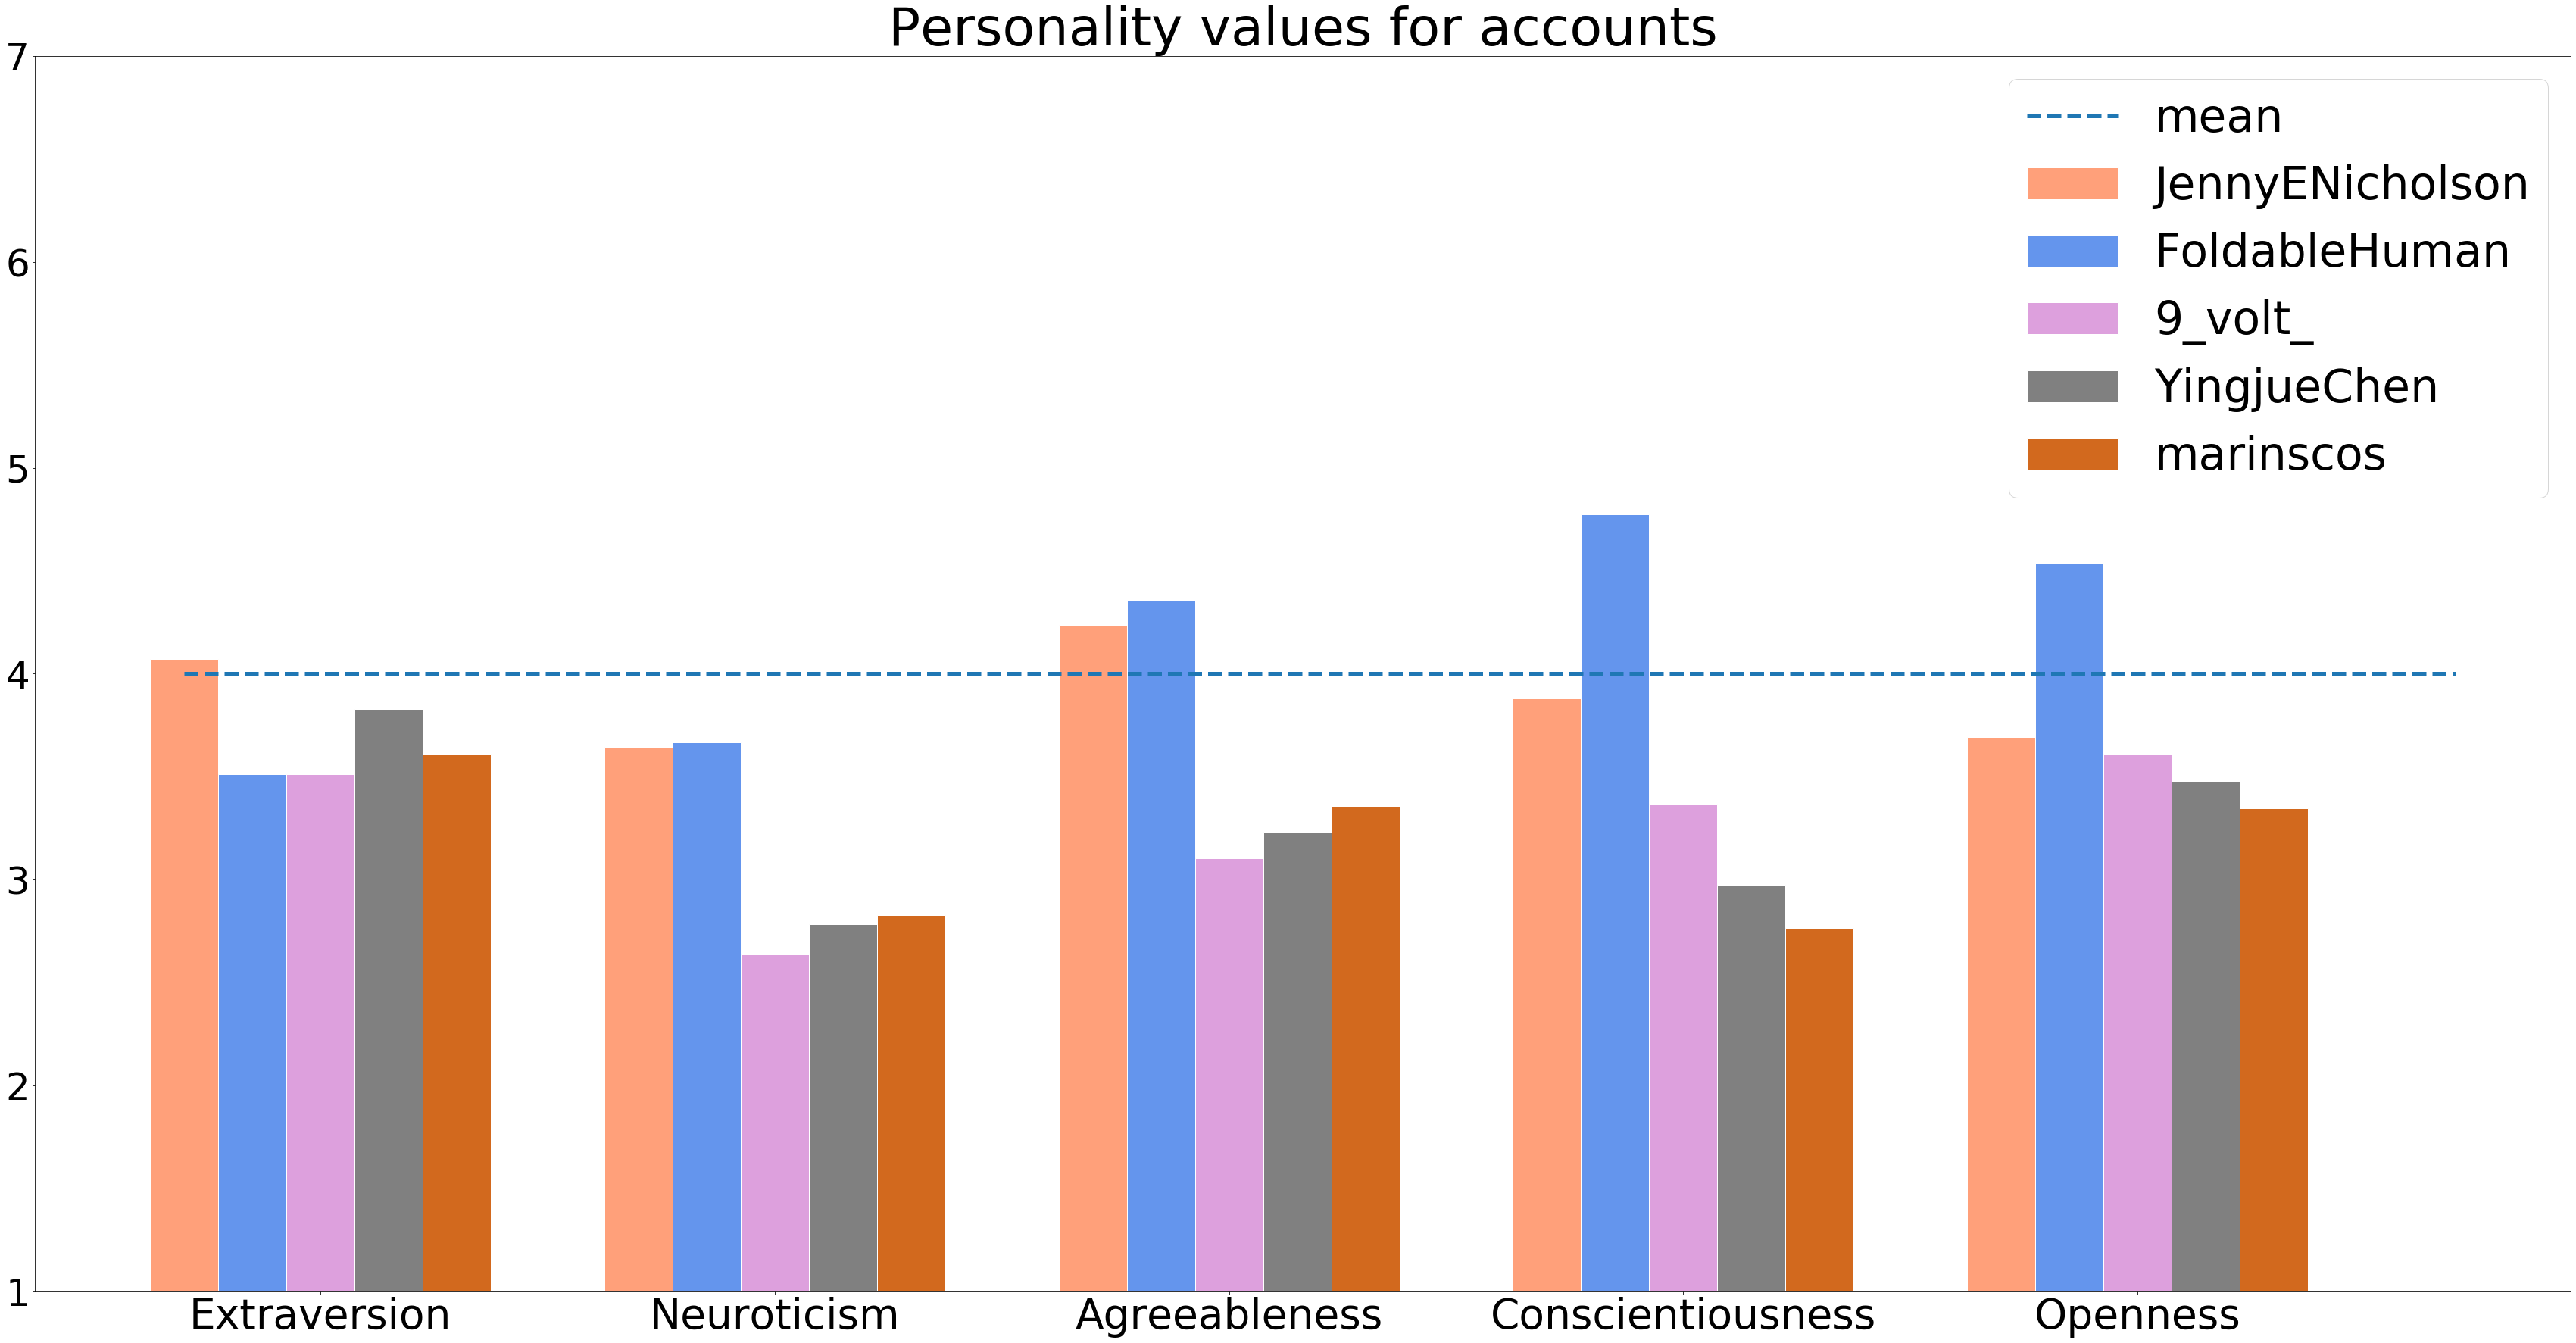

In [2]:
# By K.P.
import matplotlib.pyplot as plt
import numpy as np

#set figure parameters
plt.figure(figsize=(60,30))
axes = plt.gca()
axes.set_ylim([3,4.2])
plt.yticks(fontsize=50)
plt.xticks(fontsize=30)

def toFloat(array):
    floatArray = []
    for n in array:
        floatArray.append(float(n))
    return floatArray

def importValues(account):
    filename = 'Plottable_files/' + account + '_plottable.txt'
    with open(filename) as f:
        lines = f.readlines()
        ex = [line.split()[0] for line in lines]
        ne = [line.split()[1] for line in lines]
        ag = [line.split()[2] for line in lines]
        co = [line.split()[3] for line in lines]
        op = [line.split()[4] for line in lines]
        
        ex = toFloat(ex)
        ne = toFloat(ne)
        ag = toFloat(ag)
        co = toFloat(co)
        op = toFloat(op)

        return ex, ne, ag, co, op

def importAccounts(accounts):
    filename = 'Plottable_files/' + accounts + '_plottable.txt'
    with open(filename) as f:
        lines = f.readlines()
        jennyenicholson = lines[0].split()
        foldablehuman = lines[1].split()
        ninevolt = lines[2].split()
        yingjuechen = lines[3].split()
        marinscos = lines[4].split()

        jennyenicholson = toFloat(jennyenicholson)
        foldablehuman = toFloat(foldablehuman)
        ninevolt = toFloat(ninevolt)
        yingjuechen = toFloat(yingjuechen)
        marinscos = toFloat(marinscos)
        
    return jennyenicholson, foldablehuman, ninevolt, yingjuechen, marinscos            

# return every nth value as an array
# not utilised in the final code
def everyNth(array, nth):
    x = np.array(array)
    n = x.size
    A = x[:(n // nth) * nth].reshape(nth, -1)
    y = A.mean(axis = 0)
    return y

# Exactly the same as cumulativeSum but adds delay
def movingaverage(array, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(array, window, 'same')

# calculates moving average by utilising cumulative sum with a window
# the function is created after an implementation available at:
# https://stackoverflow.com/questions/11352047/finding-moving-average-from-data-points-in-python
def cumulativeSum(array, window_width):
    cumsum_vec = np.cumsum(np.insert(array, 0, 0)) 
    ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
    return ma_vec

def createMeanArray(ex, ne, ag, co, op):
    avg = []
    for a in ex, ne, ag, co, op:
        avg.append(np.mean(a))
    mean = []
    for i in range(np.size(ex)):
        mean.append(np.mean(avg))
    return mean

def plotResults(account, exc, nec, agc, coc, opc, mean):
    plt.plot(mean, label='mean', linestyle='--', linewidth=5)
    plt.plot(exc, linewidth=7, label = 'extraversion')
    plt.plot(nec, linewidth=7, label = 'neuroticism')
    plt.plot(agc, linewidth=7, label = 'agreeableness')
    plt.plot(coc, linewidth=7, label = 'conscientiousness')
    plt.plot(opc, linewidth=7, label = 'openness')
    plt.legend(loc='upper right', prop={'size': 40})
    tl = account + ': Change of personality over time'
    plt.title(tl, fontsize=100)
    plt.show()
    
def plotPersonalitiesAsBars(jennyenicholson, foldablehuman, ninevolt, yingjuechen, marinscos):
    barWidth = 0.15
    axes = plt.gca()
    axes.set_ylim([1,7])

    r1 = np.arange(len(jennyenicholson))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    r5 = [x + barWidth for x in r4]
    
    mean = []
    for i in range(0,6):
        mean.append(4)
    plt.plot(mean, label='mean', linestyle='--', linewidth=5)
    plt.bar(r1, jennyenicholson, color='#FFA07A', width=barWidth, edgecolor='white', label='JennyENicholson')
    plt.bar(r2, foldablehuman, color='#6495ED',width=barWidth, edgecolor='white', label='FoldableHuman')
    plt.bar(r3, ninevolt, color='#DDA0DD',width=barWidth, edgecolor='white', label='9_volt_')
    plt.bar(r4, yingjuechen,color='#808080', width=barWidth, edgecolor='white', label='YingjueChen')
    plt.bar(r5, marinscos,color='#D2691E', width=barWidth, edgecolor='white', label='marinscos')


    plt.title('Personality values for accounts', fontsize=70)
    plt.xticks([r + 0.3 for r in range(5)], ['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness'], fontsize=55)

    plt.legend(loc='upper right', prop={'size': 60})
    plt.show()
    

def main():
    account = 'accounts' #'9volt', 'foldablehuman', 'jennyenicholson', 'marinscos', 'yingjuechen'
    ex = [] # extraversion
    ne = [] # neuroticism
    ag = [] # agreeableness
    co = [] # conscientiousness
    op = [] # openness
    #jennyenicholson, foldablehuman, ninevolt, yingjuechen, marinscos = []
    
    if account == 'accounts':
        jennyenicholson, foldablehuman, ninevolt, yingjuechen, marinscos = importAccounts(account)
        plotPersonalitiesAsBars(jennyenicholson, foldablehuman, ninevolt, yingjuechen, marinscos)
    else:
        # save each of the personality values into an array
        ex, ne, ag, co, op = importValues(account)  
    
        mean = createMeanArray(ex, ne, ag, co, op)

        # calculate a moving average with cumulative sum
        window_width = 75
        exc = cumulativeSum(ex, window_width)
        nec = cumulativeSum(ne, window_width)
        agc = cumulativeSum(ag, window_width)
        coc = cumulativeSum(co, window_width)
        opc = cumulativeSum(op, window_width)

        plotResults(account, exc, nec, agc, coc, opc, mean)
  
if __name__ == "__main__":
    main()


